In [1]:
%matplotlib inline

=========================================================
Gaussian Processes regression: basic introductory example
=========================================================

A simple one-dimensional regression example computed in two different ways:

1. A noise-free case
2. A noisy case with known noise-level per datapoint

In both cases, the kernel's parameters are estimated using the maximum
likelihood principle.

The figures illustrate the interpolating property of the Gaussian Process
model as well as its probabilistic nature in the form of a pointwise 95%
confidence interval.

Note that the parameter ``alpha`` is applied as a Tikhonov
regularization of the assumed covariance between the training points.


Automatically created module for IPython interactive environment


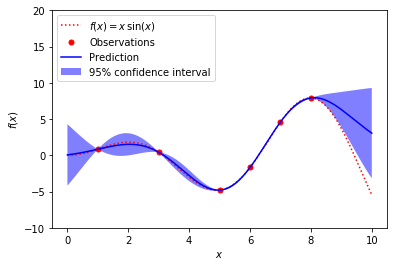

In [24]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

In [25]:
y_pred - 1.9600 * sigma

array([-4.17960923e+00, -4.13095633e+00, -4.08213201e+00, -4.03313958e+00,
       -3.98398239e+00, -3.93466385e+00, -3.88518741e+00, -3.83555656e+00,
       -3.78577485e+00, -3.73584587e+00, -3.68577326e+00, -3.63556069e+00,
       -3.58521191e+00, -3.53473067e+00, -3.48412080e+00, -3.43338616e+00,
       -3.38253066e+00, -3.33155824e+00, -3.28047289e+00, -3.22927866e+00,
       -3.17797961e+00, -3.12657988e+00, -3.07508360e+00, -3.02349499e+00,
       -2.97181829e+00, -2.92005778e+00, -2.86821777e+00, -2.81630263e+00,
       -2.76431675e+00, -2.71226456e+00, -2.66015053e+00, -2.60797918e+00,
       -2.55575504e+00, -2.50348270e+00, -2.45116676e+00, -2.39881187e+00,
       -2.34642271e+00, -2.29400400e+00, -2.24156047e+00, -2.18909691e+00,
       -2.13661812e+00, -2.08412894e+00, -2.03163423e+00, -1.97913889e+00,
       -1.92664784e+00, -1.87416603e+00, -1.82169843e+00, -1.76925005e+00,
       -1.71682592e+00, -1.66443108e+00, -1.61207061e+00, -1.55974960e+00,
       -1.50747318e+00, -

In [26]:
print(f"len x: {len(x)}")
print(f"x described {x}")

len x: 1000
x described [[ 0.        ]
 [ 0.01001001]
 [ 0.02002002]
 [ 0.03003003]
 [ 0.04004004]
 [ 0.05005005]
 [ 0.06006006]
 [ 0.07007007]
 [ 0.08008008]
 [ 0.09009009]
 [ 0.1001001 ]
 [ 0.11011011]
 [ 0.12012012]
 [ 0.13013013]
 [ 0.14014014]
 [ 0.15015015]
 [ 0.16016016]
 [ 0.17017017]
 [ 0.18018018]
 [ 0.19019019]
 [ 0.2002002 ]
 [ 0.21021021]
 [ 0.22022022]
 [ 0.23023023]
 [ 0.24024024]
 [ 0.25025025]
 [ 0.26026026]
 [ 0.27027027]
 [ 0.28028028]
 [ 0.29029029]
 [ 0.3003003 ]
 [ 0.31031031]
 [ 0.32032032]
 [ 0.33033033]
 [ 0.34034034]
 [ 0.35035035]
 [ 0.36036036]
 [ 0.37037037]
 [ 0.38038038]
 [ 0.39039039]
 [ 0.4004004 ]
 [ 0.41041041]
 [ 0.42042042]
 [ 0.43043043]
 [ 0.44044044]
 [ 0.45045045]
 [ 0.46046046]
 [ 0.47047047]
 [ 0.48048048]
 [ 0.49049049]
 [ 0.5005005 ]
 [ 0.51051051]
 [ 0.52052052]
 [ 0.53053053]
 [ 0.54054054]
 [ 0.55055055]
 [ 0.56056056]
 [ 0.57057057]
 [ 0.58058058]
 [ 0.59059059]
 [ 0.6006006 ]
 [ 0.61061061]
 [ 0.62062062]
 [ 0.63063063]
 [ 0.64064064]
 

In [27]:
print(f"len y_pred: {len(y_pred)}")
print(f"y_pred described {y_pred}")

len y_pred: 1000
y_pred described [ 6.31562726e-02  6.82705965e-02  7.34471199e-02  7.86858926e-02
  8.39869546e-02  8.93503356e-02  9.47760555e-02  1.00264123e-01
  1.05814538e-01  1.11427288e-01  1.17102350e-01  1.22839692e-01
  1.28639268e-01  1.34501024e-01  1.40424892e-01  1.46410794e-01
  1.52458641e-01  1.58568331e-01  1.64739750e-01  1.70972775e-01
  1.77267267e-01  1.83623078e-01  1.90040046e-01  1.96517997e-01
  2.03056745e-01  2.09656090e-01  2.16315820e-01  2.23035712e-01
  2.29815526e-01  2.36655013e-01  2.43553907e-01  2.50511932e-01
  2.57528797e-01  2.64604197e-01  2.71737814e-01  2.78929316e-01
  2.86178357e-01  2.93484578e-01  3.00847603e-01  3.08267046e-01
  3.15742503e-01  3.23273558e-01  3.30859779e-01  3.38500721e-01
  3.46195922e-01  3.53944906e-01  3.61747185e-01  3.69602251e-01
  3.77509586e-01  3.85468652e-01  3.93478900e-01  4.01539764e-01
  4.09650661e-01  4.17810995e-01  4.26020154e-01  4.34277509e-01
  4.42582417e-01  4.50934218e-01  4.59332237e-01  4.6777

In [28]:
print(f"len sigma: {len(sigma)}")
print(f"sigma: {sigma[0:10]}")


len sigma: 1000
sigma: [2.16467628 2.14246272 2.12019343 2.09787014 2.07549456 2.05306846
 2.0305936  2.00807178 1.98550479 1.96289447]


# Noisy case


In [29]:
X = np.linspace(0.1, 9.9, 20)
# ----------------------------------------------------------------------
# now the noisy case
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)


GaussianProcessRegressor(alpha=array([0.41009543, 0.48734569, 1.69193643, 2.15579205, 0.66165889,
       1.42163322, 1.8944471 , 1.94492775, 0.34227673, 0.29058006,
       0.44867279, 1.89927676, 0.35801893, 0.84843926, 2.12544188,
       1.06743051, 1.42057105, 0.66506574, 1.40778445, 1.78122568]),
                         copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [30]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

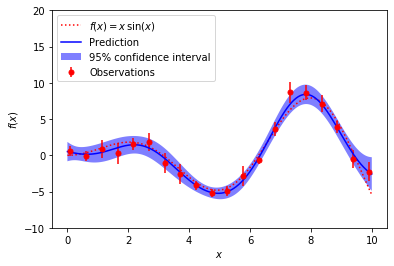

In [31]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()


In [32]:
X


array([[0.1       ],
       [0.61578947],
       [1.13157895],
       [1.64736842],
       [2.16315789],
       [2.67894737],
       [3.19473684],
       [3.71052632],
       [4.22631579],
       [4.74210526],
       [5.25789474],
       [5.77368421],
       [6.28947368],
       [6.80526316],
       [7.32105263],
       [7.83684211],
       [8.35263158],
       [8.86842105],
       [9.38421053],
       [9.9       ]])

In [33]:
x.shape

(1000, 1)

In [34]:
y_pred

array([ 5.16414418e-01,  5.06761088e-01,  4.97164221e-01,  4.87627288e-01,
        4.78153758e-01,  4.68747097e-01,  4.59410769e-01,  4.50148231e-01,
        4.40962936e-01,  4.31858327e-01,  4.22837839e-01,  4.13904897e-01,
        4.05062914e-01,  3.96315290e-01,  3.87665411e-01,  3.79116646e-01,
        3.70672347e-01,  3.62335850e-01,  3.54110469e-01,  3.45999496e-01,
        3.38006202e-01,  3.30133834e-01,  3.22385612e-01,  3.14764730e-01,
        3.07274356e-01,  2.99917626e-01,  2.92697645e-01,  2.85617487e-01,
        2.78680193e-01,  2.71888766e-01,  2.65246176e-01,  2.58755355e-01,
        2.52419192e-01,  2.46240541e-01,  2.40222212e-01,  2.34366970e-01,
        2.28677538e-01,  2.23156594e-01,  2.17806767e-01,  2.12630638e-01,
        2.07630740e-01,  2.02809554e-01,  1.98169509e-01,  1.93712980e-01,
        1.89442289e-01,  1.85359701e-01,  1.81467425e-01,  1.77767611e-01,
        1.74262349e-01,  1.70953671e-01,  1.67843545e-01,  1.64933876e-01,
        1.62226507e-01,  

In [35]:
y_pred.shape

(1000,)

In [36]:
lb = y_pred - 1.9600 * sigma
print(lb.shape)
lb


(1000,)


array([-8.22584884e-01, -8.10092006e-01, -7.98102158e-01, -7.86621683e-01,
       -7.75656789e-01, -7.65213511e-01, -7.55297663e-01, -7.45914789e-01,
       -7.37070109e-01, -7.28768461e-01, -7.21014239e-01, -7.13811329e-01,
       -7.07163043e-01, -7.01072051e-01, -6.95540308e-01, -6.90568990e-01,
       -6.86158420e-01, -6.82308004e-01, -6.79016169e-01, -6.76280303e-01,
       -6.74096700e-01, -6.72460519e-01, -6.71365746e-01, -6.70805161e-01,
       -6.70770328e-01, -6.71251582e-01, -6.72238039e-01, -6.73717608e-01,
       -6.75677026e-01, -6.78101892e-01, -6.80976724e-01, -6.84285018e-01,
       -6.88009321e-01, -6.92131307e-01, -6.96631871e-01, -7.01491212e-01,
       -7.06688936e-01, -7.12204152e-01, -7.18015570e-01, -7.24101601e-01,
       -7.30440456e-01, -7.37010236e-01, -7.43789027e-01, -7.50754983e-01,
       -7.57886405e-01, -7.65161818e-01, -7.72560035e-01, -7.80060219e-01,
       -7.87641939e-01, -7.95285216e-01, -8.02970562e-01, -8.10679019e-01,
       -8.18392182e-01, -

In [37]:
sigma

array([0.68316291, 0.67186382, 0.66085019, 0.65012703, 0.63969926,
       0.62957174, 0.6197492 , 0.61023623, 0.60103727, 0.59215652,
       0.583598  , 0.57536542, 0.56746222, 0.5598915 , 0.55265598,
       0.54575798, 0.53919937, 0.53298156, 0.52710543, 0.52157133,
       0.51637903, 0.51152773, 0.507016  , 0.50284178, 0.49900239,
       0.49549449, 0.49231412, 0.48945668, 0.48691695, 0.48468911,
       0.48276679, 0.48114305, 0.47981047, 0.47876115, 0.47798678,
       0.47747866, 0.47722779, 0.47722487, 0.47746038, 0.47792461,
       0.47860775, 0.47949989, 0.48059109, 0.48187141, 0.48333097,
       0.48495996, 0.4867487 , 0.48868767, 0.49076749, 0.49297902,
       0.49531332, 0.49776168, 0.50031566, 0.50296706, 0.50570798,
       0.50853077, 0.51142807, 0.51439282, 0.51741821, 0.52049773,
       0.52362515, 0.52679452, 0.53000014, 0.53323658, 0.53649868,
       0.53978153, 0.54308043, 0.54639094, 0.54970886, 0.55303017,
       0.55635109, 0.55966803, 0.56297759, 0.56627655, 0.56956

In [38]:
sigma.shape

(1000,)